In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotcust import *
import os
import sys
path = os.path.abspath(os.getcwd())
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

In [2]:
covid = pd.read_csv(path + '/wwcovid.csv', low_memory=False, encoding='ISO-8859-1')

In [3]:
covid.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'PIB', 'lat', 'long'],
      dtype='object')

In [4]:
covid.shape

(8667, 13)

In [5]:
covid.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,PIB,lat,long
0,03/04/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0
1,02/04/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0
2,01/04/2020,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0
3,31/03/2020,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0
4,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0
5,29/03/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0
6,28/03/2020,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0
7,27/03/2020,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0
8,26/03/2020,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0
9,25/03/2020,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0


In [6]:
covid['month'].loc[covid['month'] == 4] = 91
covid['month'].loc[covid['month'] == 3] = 60
covid['month'].loc[covid['month'] == 2] = 31
covid['month'].loc[covid['month'] == 1] = 0
covid['daymonth'] = covid['month']+covid['day']

In [7]:
cases = covid.groupby('countriesAndTerritories').agg(['sum'])['cases'].reset_index()

In [8]:
cases.columns = ['countries','cases']

In [9]:
casesOver3000 = cases.loc[cases['cases']>3500]

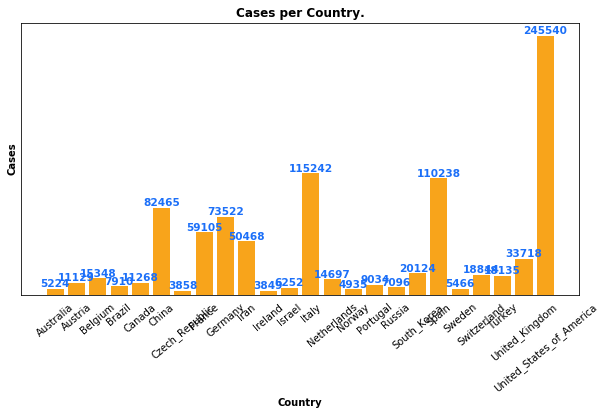

In [10]:
tox = casesOver3000['countries'].tolist()
height =  casesOver3000['cases'].tolist()
fsize = (10,5)
fig, ax = plt.subplots(figsize=fsize)
rects1 = ax.bar(tox, height , color='#F8A41B')
#####################################################################################
ax.set_title('Cases per Country.',fontweight='bold')
ax.set_xticklabels(casesOver3000['countries'].tolist())
ax.set_ylabel('Cases',fontweight='bold')
ax.set_xlabel('Country',fontweight='bold')
#####################################################################################
ax.set_yticks([])
plt.xticks(rotation=40)
ax.xaxis.set_ticks_position('none')
autolabelint(ax, rects1, fsize,'#1B6FF8')
plt.show()


In [11]:
##################################################################

In [12]:
covidOver3000 = covid.loc[covid['countriesAndTerritories'].isin(casesOver3000.countries)]

In [13]:
countrymrate = covidOver3000.groupby('countriesAndTerritories').agg(['sum'])['deaths']*100/covidOver3000.groupby('countriesAndTerritories').agg(['sum'])['cases']
countrymrate.reset_index(inplace=True)
countrymrate.columns = ['countries','mrate']

In [14]:
countrymrate.head()

,countries,mrate
0,Australia,0.440276
1,Austria,1.419714
2,Belgium,6.587177
3,Brazil,3.780025
4,Canada,1.224707


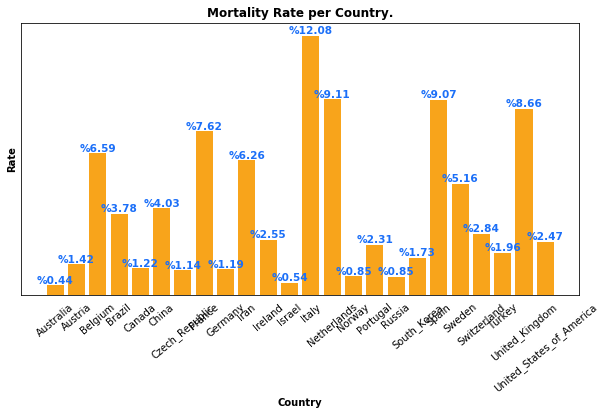

In [15]:
tox = countrymrate['countries'].tolist()
height =  countrymrate['mrate'].tolist()
fsize = (10,5)
fig, ax = plt.subplots(figsize=fsize)
rects1 = ax.bar(tox, height , color='#F8A41B')
#####################################################################################
ax.set_title('Mortality Rate per Country.',fontweight='bold')
ax.set_xticklabels(tox)
ax.set_ylabel('Rate',fontweight='bold')
ax.set_xlabel('Country',fontweight='bold')
#####################################################################################
ax.set_yticks([])
plt.xticks(rotation=40)
ax.xaxis.set_ticks_position('none')
autolabelpercent(ax, rects1, fsize,'#1B6FF8')
plt.show()

In [16]:
###################################################################

In [17]:
covidDeaths = covid.groupby('countriesAndTerritories').agg('sum')['deaths'].reset_index()
covidDeathsOver100 = covidDeaths.loc[covidDeaths['deaths']>150]
covidDeathsOver100.columns = ['countries','deaths']

In [18]:
covidDeathsOver100

,countries,deaths
10,Austria,158
17,Belgium,1011
25,Brazil,299
39,China,3326
64,France,4503
69,Germany,872
85,Indonesia,170
86,Iran,3160
91,Italy,13917
125,Netherlands,1339


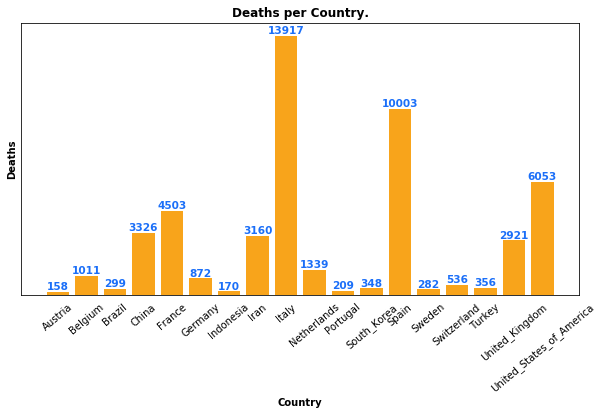

In [19]:
tox = covidDeathsOver100['countries'].tolist()
height =  covidDeathsOver100['deaths'].tolist()
fsize = (10,5)
fig, ax = plt.subplots(figsize=fsize)
rects1 = ax.bar(tox, height , color='#F8A41B')
#####################################################################################
ax.set_title('Deaths per Country.',fontweight='bold')
ax.set_xticklabels(tox)
ax.set_ylabel('Deaths',fontweight='bold')
ax.set_xlabel('Country',fontweight='bold')
#####################################################################################
ax.set_yticks([])
plt.xticks(rotation=40)
ax.xaxis.set_ticks_position('none')
autolabelint(ax, rects1, fsize,'#1B6FF8')
plt.show()

In [20]:
##########################################################################

In [21]:
simil = covid.loc[covid['countriesAndTerritories'] == 'Argentina']['cases'].sum()

In [22]:
argentinaSimilCountries = cases.loc[(cases['cases']>=simil-simil*.2 ) & (cases['cases']<=simil+simil*.2)]['countries']
argentinaSimilCountries.size

8

In [23]:
argentinaSimil = covid.loc[covid['countriesAndTerritories'].isin(argentinaSimilCountries)]

In [24]:
argentinaSimil.head(1)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,PIB,lat,long,daymonth
250,03/04/2020,3,91,2020,0,3,Argentina,AR,ARG,44494502.0,5.198715e+11,-34.0,-34.0,94


In [25]:
argentinaSimil.shape
argentinaSimil['countriesAndTerritories'].loc[argentinaSimil['countriesAndTerritories'].str.contains('Japan')] = 'JapanC'

In [26]:
argentinaSimilDeaths = argentinaSimil.groupby('countriesAndTerritories').agg('sum')['deaths'].reset_index()
argentinaSimilDeaths.columns = ['countries','deaths']

In [27]:
argentinaSimilDeaths

,countries,deaths
0,Argentina,34
1,Colombia,19
2,Croatia,7
3,Iceland,4
4,Qatar,3
5,Serbia,31
6,Singapore,5
7,United_Arab_Emirates,8


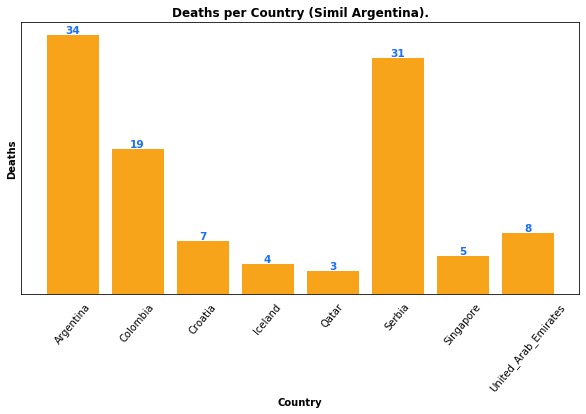

In [28]:
tox = argentinaSimilDeaths['countries'].tolist()
height =  argentinaSimilDeaths['deaths'].tolist()
fsize = (10,5)
fig, ax = plt.subplots(figsize=fsize)
rects1 = ax.bar(tox, height , color='#F8A41B')
#####################################################################################
ax.set_title('Deaths per Country (Simil Argentina).',fontweight='bold')
ax.set_xticklabels(tox)
ax.set_ylabel('Deaths',fontweight='bold')
ax.set_xlabel('Country',fontweight='bold')
#####################################################################################
ax.set_yticks([])
plt.xticks(rotation=50)
ax.xaxis.set_ticks_position('none')
autolabelint(ax, rects1, fsize,'#1B6FF8')
plt.show()

In [29]:
##################################################################

In [30]:
covid.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,PIB,lat,long,daymonth
0,03/04/2020,3,91,2020,43,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0,94
1,02/04/2020,2,91,2020,26,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0,93
2,01/04/2020,1,91,2020,25,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0,92
3,31/03/2020,31,60,2020,27,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0,91
4,30/03/2020,30,60,2020,8,1,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0,90


In [31]:
################ drop 0 cases until first

In [32]:
gruped = covid.sort_values('daymonth',ascending=True).groupby('countriesAndTerritories')

In [33]:
argentinaCases = gruped.get_group('Argentina')[['cases','daymonth']]
usaCases = gruped.get_group('United_States_of_America')[['cases','daymonth']]
uruguayCases = gruped.get_group('Uruguay')[['cases','daymonth']]
italiaCases = gruped.get_group('Italy')[['cases','daymonth']]
brasilCases = gruped.get_group('Brazil')[['cases','daymonth']]
colombiaCases = gruped.get_group('Colombia')[['cases','daymonth']]
espanaCases = gruped.get_group('Spain')[['cases','daymonth']]
egiptoCases = gruped.get_group('Egypt')[['cases','daymonth']]
chileCases = gruped.get_group('Chile')[['cases','daymonth']]
mexicoCases = gruped.get_group('Mexico')[['cases','daymonth']]
alemaniaCases = gruped.get_group('Germany')[['cases','daymonth']]
coreaCases = gruped.get_group('South_Korea')[['cases','daymonth']]
iranCases = gruped.get_group('Iran')[['cases','daymonth']]
chinaCases = gruped.get_group('China')[['cases','daymonth']]

In [34]:
gruped.get_group('Colombia')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,PIB,lat,long,daymonth
1730,07/03/2020,7,60,2020,1,0,Colombia,CO,COL,49648685.0,3.310470e+11,4.0,4.0,67
1729,10/03/2020,10,60,2020,2,0,Colombia,CO,COL,49648685.0,3.310470e+11,4.0,4.0,70
1728,12/03/2020,12,60,2020,6,0,Colombia,CO,COL,49648685.0,3.310470e+11,4.0,4.0,72
1727,14/03/2020,14,60,2020,7,0,Colombia,CO,COL,49648685.0,3.310470e+11,4.0,4.0,74
1726,15/03/2020,15,60,2020,18,0,Colombia,CO,COL,49648685.0,3.310470e+11,4.0,4.0,75
1725,16/03/2020,16,60,2020,11,0,Colombia,CO,COL,49648685.0,3.310470e+11,4.0,4.0,76
1724,17/03/2020,17,60,2020,12,0,Colombia,CO,COL,49648685.0,3.310470e+11,4.0,4.0,77
1723,18/03/2020,18,60,2020,8,0,Colombia,CO,COL,49648685.0,3.310470e+11,4.0,4.0,78
1722,19/03/2020,19,60,2020,37,0,Colombia,CO,COL,49648685.0,3.310470e+11,4.0,4.0,79
1721,20/03/2020,20,60,2020,26,0,Colombia,CO,COL,49648685.0,3.310470e+11,4.0,4.0,80


In [35]:
def removeUntilFirst(data):
    data['cases1'] = data['cases'].shift(1)
    data1 = data.loc[~(np.isclose(data['cases'],0) & np.isclose(data['cases1'],0))]
    data1.drop('cases1',axis=1,inplace=True)
    data1['daymonth'] = 1
    data1['daymonth'] = data1['daymonth'].cumsum()
    data1 = data1.head(60)
    return data1

In [36]:
usaEvo = removeUntilFirst(usaCases)
mexicoEvo = removeUntilFirst(mexicoCases)
argentinaEvo = removeUntilFirst(argentinaCases)
colombiaEvo = removeUntilFirst(colombiaCases)
egiptoEvo = removeUntilFirst(egiptoCases)
chileEvo = removeUntilFirst(chileCases)
espanaEvo = removeUntilFirst(espanaCases)
italiaEvo = removeUntilFirst(italiaCases)
uruguayEvo = removeUntilFirst(uruguayCases)
brasilEvo = removeUntilFirst(brasilCases)
coreaEvo = removeUntilFirst(coreaCases)
alemaniaEvo = removeUntilFirst(alemaniaCases)
chinaEvo = removeUntilFirst(chinaCases)
iranEvo = removeUntilFirst(iranCases)

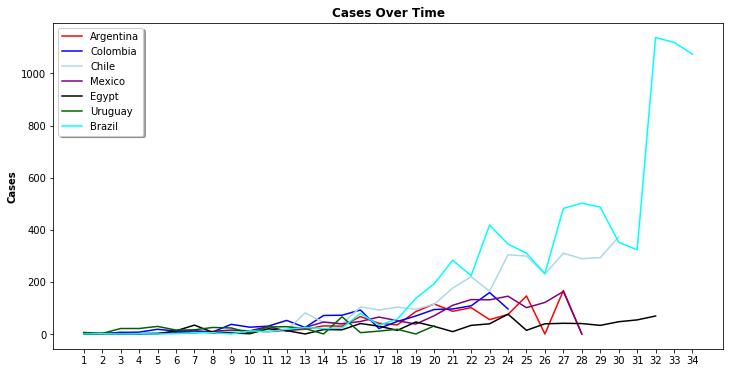

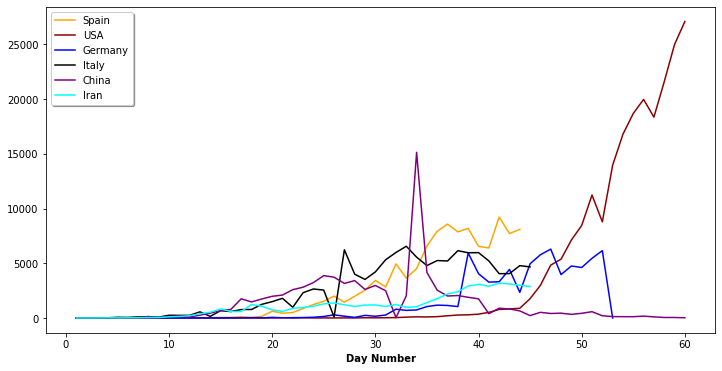

In [37]:
fsize = (12,6)
fig, ax = plt.subplots(figsize=fsize)
ax.plot(argentinaEvo['daymonth'].tolist(), argentinaEvo['cases'].tolist() , color='red', label = 'Argentina')
ax.plot(colombiaEvo['daymonth'].tolist(), colombiaEvo['cases'].tolist() , color='blue',label = 'Colombia')
ax.plot(chileEvo['daymonth'].tolist(), chileEvo['cases'].tolist() , color='lightblue',label = 'Chile')
ax.plot(mexicoEvo['daymonth'].tolist(), mexicoEvo['cases'].tolist() , color='purple',label = 'Mexico')
ax.plot(egiptoEvo['daymonth'].tolist(), egiptoEvo['cases'].tolist() , color='black',label = 'Egypt')
ax.plot(uruguayEvo['daymonth'].tolist(), uruguayEvo['cases'].tolist() , color='darkgreen',label = 'Uruguay')
ax.plot(brasilEvo['daymonth'].tolist(), brasilEvo['cases'].tolist() , color='cyan',label = 'Brazil')
plt.xticks(np.arange(1, 35, 1.0))
legend = ax.legend(loc='best', shadow=True)
#legend.get_frame().set_facecolor('C0')
####################################################################################
fig2, ax2 = plt.subplots(figsize=fsize)
ax2.plot(espanaEvo['daymonth'].tolist(), espanaEvo['cases'].tolist() , color='orange',label = 'Spain')
ax2.plot(usaEvo['daymonth'].tolist(), usaEvo['cases'].tolist() , color='darkred',label = 'USA')
ax2.plot(alemaniaEvo['daymonth'].tolist(), alemaniaEvo['cases'].tolist() , color='blue',label = 'Germany')
ax2.plot(italiaEvo['daymonth'].tolist(), italiaEvo['cases'].tolist() , color='black', label = 'Italy')
#ax2.plot(coreaEvo['daymonth'].tolist(), coreaEvo['cases'].tolist() , color='green', label = 'South Korea')
ax2.plot(chinaEvo['daymonth'].tolist(), chinaEvo['cases'].tolist() , color='purple', label = 'China')
ax2.plot(iranEvo['daymonth'].tolist(), iranEvo['cases'].tolist() , color='cyan', label = 'Iran')
#plt.xticks(np.arange(1, 71, 1.0))
legend = ax2.legend(loc='best', shadow=True)
#####################################################################################
ax.set_title('Cases Over Time',fontweight='bold')
ax.set_ylabel('Cases',fontweight='bold')
ax2.set_xlabel('Day Number',fontweight='bold')
#####################################################################################
#ax.xaxis.set_ticks_position('none')
plt.show()

In [38]:
covid.loc[covid['cases']==covid['cases'].max()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,PIB,lat,long,daymonth
8271,03/04/2020,3,91,2020,28819,915,United_States_of_America,US,USA,327167434.0,2.054434e+13,38.0,38.0,94


In [39]:
argentinaEvo['cases'] = argentinaEvo['cases'].cumsum()
italiaEvo['cases'] = italiaEvo['cases'].cumsum()
colombiaEvo['cases'] = colombiaEvo['cases'].cumsum()
espanaEvo['cases'] = espanaEvo['cases'].cumsum()
egiptoEvo['cases'] = egiptoEvo['cases'].cumsum()
chileEvo['cases'] = chileEvo['cases'].cumsum()
mexicoEvo['cases'] = mexicoEvo['cases'].cumsum()
brasilEvo['cases'] = brasilEvo['cases'].cumsum()
uruguayEvo['cases'] = uruguayEvo['cases'].cumsum()
alemaniaEvo['cases'] = alemaniaEvo['cases'].cumsum()
coreaEvo['cases'] = coreaEvo['cases'].cumsum()
iranEvo['cases'] = iranEvo['cases'].cumsum()
chinaEvo['cases'] = chinaEvo['cases'].cumsum()
usaEvo['cases'] = usaEvo['cases'].cumsum()

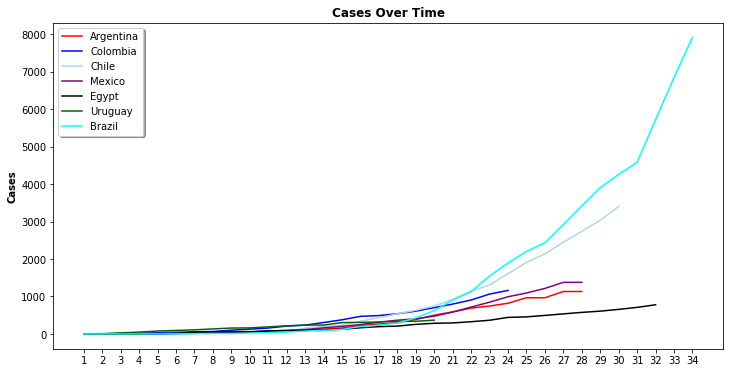

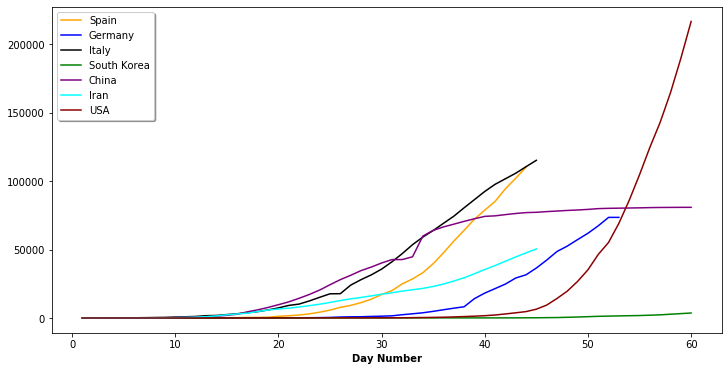

In [40]:
fsize = (12,6)
fig, ax = plt.subplots(figsize=fsize)
ax.plot(argentinaEvo['daymonth'].tolist(), argentinaEvo['cases'].tolist() , color='red', label = 'Argentina')
ax.plot(colombiaEvo['daymonth'].tolist(), colombiaEvo['cases'].tolist() , color='blue',label = 'Colombia')
ax.plot(chileEvo['daymonth'].tolist(), chileEvo['cases'].tolist() , color='lightblue',label = 'Chile')
ax.plot(mexicoEvo['daymonth'].tolist(), mexicoEvo['cases'].tolist() , color='purple',label = 'Mexico')
ax.plot(egiptoEvo['daymonth'].tolist(), egiptoEvo['cases'].tolist() , color='black',label = 'Egypt')
ax.plot(uruguayEvo['daymonth'].tolist(), uruguayEvo['cases'].tolist() , color='darkgreen',label = 'Uruguay')
ax.plot(brasilEvo['daymonth'].tolist(), brasilEvo['cases'].tolist() , color='cyan',label = 'Brazil')
plt.xticks(np.arange(1, 35, 1.0))
legend = ax.legend(loc='best', shadow=True)
#legend.get_frame().set_facecolor('C0')
####################################################################################
fig2, ax2 = plt.subplots(figsize=fsize)
ax2.plot(espanaEvo['daymonth'].tolist(), espanaEvo['cases'].tolist() , color='orange',label = 'Spain')
ax2.plot(alemaniaEvo['daymonth'].tolist(), alemaniaEvo['cases'].tolist() , color='blue',label = 'Germany')
ax2.plot(italiaEvo['daymonth'].tolist(), italiaEvo['cases'].tolist() , color='black', label = 'Italy')
ax2.plot(coreaEvo['daymonth'].tolist(), coreaEvo['cases'].tolist() , color='green', label = 'South Korea')
ax2.plot(chinaEvo['daymonth'].tolist(), chinaEvo['cases'].tolist() , color='purple', label = 'China')
ax2.plot(iranEvo['daymonth'].tolist(), iranEvo['cases'].tolist() , color='cyan', label = 'Iran')
ax2.plot(usaEvo['daymonth'].tolist(), usaEvo['cases'].tolist() , color='darkred', label = 'USA')
#plt.xticks(np.arange(1, 71, 1.0))
legend = ax2.legend(loc='best', shadow=True)
#####################################################################################
ax.set_title('Cases Over Time',fontweight='bold')
ax.set_ylabel('Cases',fontweight='bold')
ax2.set_xlabel('Day Number',fontweight='bold')
#####################################################################################
#ax.xaxis.set_ticks_position('none')
plt.show()

In [41]:
######################################################

In [42]:
covid.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'PIB', 'lat', 'long', 'daymonth'],
      dtype='object')

In [43]:
covid['popData2018'].isna().value_counts()

False    8667
Name: popData2018, dtype: int64

In [44]:
covid['popData2018'] = covid['popData2018'].apply(int)

In [45]:
covidDeaths = covid.groupby('countriesAndTerritories').agg('sum')['deaths'].reset_index()
covidDeathsOver100 = covidDeaths.loc[covidDeaths['deaths']>100]
covidDeathsOver100 = covidDeathsOver100.merge(covid[['countriesAndTerritories','popData2018']].drop_duplicates('countriesAndTerritories'),on='countriesAndTerritories')
covidDeathsOver100.columns = ['countries','deaths','population']

In [46]:
covidDeathsOver100 = covidDeathsOver100.loc[covidDeathsOver100['population']>1000000] 

In [47]:
covidDeathsOver100['deathrate'] = covidDeathsOver100['deaths']/covidDeathsOver100['population']

In [48]:
covidDeathsOver100

,countries,deaths,population,deathrate
0,Austria,158,8847037,1.785909e-05
1,Belgium,1011,11422068,8.851287e-05
2,Brazil,299,209469333,1.427417e-06
3,Canada,138,37058856,3.723806e-06
4,China,3326,1392730000,2.388115e-06
5,Denmark,123,5797446,2.121624e-05
6,Ecuador,120,17084357,7.023969e-06
7,France,4503,66987244,6.722175e-05
8,Germany,872,82927922,1.051516e-05
9,Indonesia,170,267663435,6.351260e-07


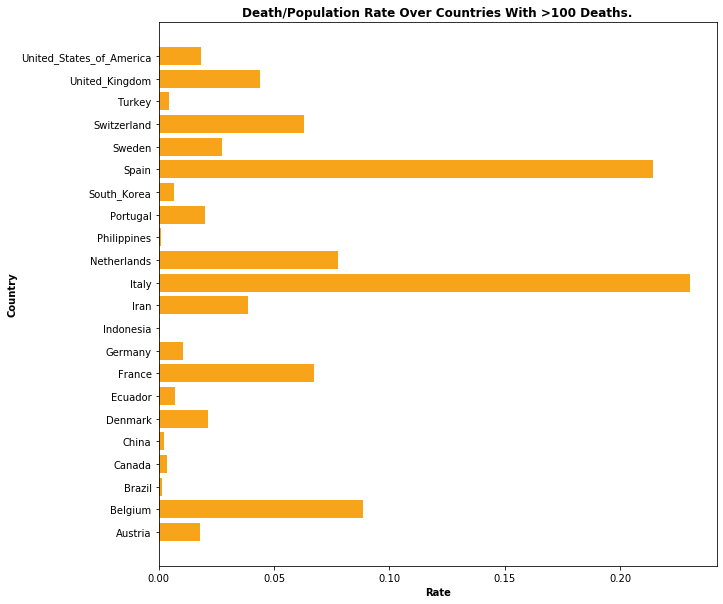

In [49]:
tox = covidDeathsOver100['countries'].tolist()
height =  (covidDeathsOver100['deathrate']*1000).values
fsize = (10,10)
fig, ax = plt.subplots(figsize=fsize)
rects1 = ax.barh(tox, height , color='#F8A41B')
#####################################################################################
ax.set_title('Death/Population Rate Over Countries With >100 Deaths.',fontweight='bold')
ax.set_yticklabels(tox)
ax.set_xlabel('Rate',fontweight='bold')
ax.set_ylabel('Country',fontweight='bold')
#####################################################################################
#ax.set_yticks([])
#plt.xticks(rotation=90)
#ax.xaxis.set_ticks_position('none')
#autolabelfloat(ax, rects1, fsize,'#1B6FF8')
plt.show()

In [50]:
############################################################################

In [51]:
covid.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018', 'PIB', 'lat', 'long', 'daymonth'],
      dtype='object')

In [52]:
def covidShifter(df,s,col):
    df['previous' + col + str(s)] = covid[col].shift(-s)
    df['previous' + col + str(s)].loc[(df['countriesAndTerritories'] != covid['countriesAndTerritories'].shift(-s))] = 0
    df['previous' + col + str(s)] = df['previous' + col  + str(s)].fillna(0).apply(int)
    return(df)

In [53]:
for s in range(1,90):
    covid = covidShifter(covid,s,'cases')
    covid = covidShifter(covid,s,'deaths')

In [54]:
gruped.get_group('Afghanistan').shape

(85, 14)

In [55]:
gruped.get_group('Afghanistan').head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,PIB,lat,long,daymonth
83,01/01/2020,1,0,2020,0,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0,1
82,02/01/2020,2,0,2020,0,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0,2
81,03/01/2020,3,0,2020,0,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0,3
80,04/01/2020,4,0,2020,0,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0,4
79,05/01/2020,5,0,2020,0,0,Afghanistan,AF,AFG,37172386.0,1.936297e+10,33.0,33.0,5


In [56]:
covid[['countriesAndTerritories','cases','previouscases1','previouscases2','previouscases3','previouscases4','previouscases5','previouscases6','previouscases7']][80:95]

,countriesAndTerritories,cases,previouscases1,previouscases2,previouscases3,previouscases4,previouscases5,previouscases6,previouscases7
80,Afghanistan,0,0,0,0,0,0,0,0
81,Afghanistan,0,0,0,0,0,0,0,0
82,Afghanistan,0,0,0,0,0,0,0,0
83,Afghanistan,0,0,0,0,0,0,0,0
84,Afghanistan,0,0,0,0,0,0,0,0
85,Angola,0,1,0,0,3,0,1,1
86,Angola,1,0,0,3,0,1,1,0
87,Angola,0,0,3,0,1,1,0,0
88,Angola,0,3,0,1,1,0,0,0
89,Angola,3,0,1,1,0,0,0,0


In [57]:
covid = covid.loc[~((covid['cases']==0) & (covid['previouscases1']==0) & (covid['previouscases2']==0) & (covid['previouscases3']==0) & (covid['previouscases4']==0) & (covid['previouscases5']==0))]

In [58]:
covid.shape

(5175, 192)

In [59]:
covid['date'] = covid['dateRep']
covid.drop(['year','dateRep','geoId','countryterritoryCode'],axis=1,inplace=True)

In [60]:
covid.columns

Index(['day', 'month', 'cases', 'deaths', 'countriesAndTerritories',
       'popData2018', 'PIB', 'lat', 'long', 'daymonth',
       ...
       'previousdeaths85', 'previouscases86', 'previousdeaths86',
       'previouscases87', 'previousdeaths87', 'previouscases88',
       'previousdeaths88', 'previouscases89', 'previousdeaths89', 'date'],
      dtype='object', length=189)

In [61]:
covid['acumcases1-5'] = covid['previouscases1'] + covid['previouscases2'] + covid['previouscases3'] + covid['previouscases4'] + covid['previouscases5']
covid['acumcases6-10'] = covid['previouscases5'] + covid['previouscases6'] + covid['previouscases7'] + covid['previouscases8'] + covid['previouscases9'] + covid['previouscases10']
covid['acumcases16-20'] = covid['previouscases16'] + covid['previouscases17'] + covid['previouscases18'] + covid['previouscases19'] + covid['previouscases20']
covid['acumcases11-15'] = covid['previouscases11'] + covid['previouscases12'] + covid['previouscases13'] + covid['previouscases14'] + covid['previouscases15']
covid['acumcases21-25'] = covid['previouscases21'] + covid['previouscases22'] + covid['previouscases23'] + covid['previouscases24'] + covid['previouscases25']
covid['acumcases26-30'] = covid['previouscases26'] + covid['previouscases27'] + covid['previouscases28'] + covid['previouscases29'] + covid['previouscases30']
covid['acumcases31-35'] = covid['previouscases31'] + covid['previouscases32'] + covid['previouscases33'] + covid['previouscases34'] + covid['previouscases35']
covid['acumdeaths1-5'] = covid['previousdeaths1'] + covid['previousdeaths2'] + covid['previousdeaths3'] + covid['previousdeaths4'] + covid['previousdeaths5']
covid['acumdeaths6-10'] = covid['previousdeaths6'] + covid['previousdeaths7'] + covid['previousdeaths8'] + covid['previousdeaths9'] + covid['previousdeaths10']
covid['acumdeaths11-15'] = covid['previousdeaths11'] + covid['previousdeaths12']  + covid['previousdeaths13']  + covid['previousdeaths14'] + covid['previousdeaths15']
covid['acumdeaths16-20'] = covid['previousdeaths16'] + covid['previousdeaths17']  + covid['previousdeaths18']  + covid['previousdeaths19'] + covid['previousdeaths20']
covid['acumdeaths21-25'] = covid['previousdeaths21'] + covid['previousdeaths22']  + covid['previousdeaths23']  + covid['previousdeaths24'] + covid['previousdeaths25']
covid['acumdeaths26-30'] = covid['previousdeaths26'] + covid['previousdeaths27']  + covid['previousdeaths28']  + covid['previousdeaths29'] + covid['previousdeaths30']
covid['acumdeaths31-35'] = covid['previousdeaths31'] + covid['previousdeaths32']  + covid['previousdeaths33']  + covid['previousdeaths34'] + covid['previousdeaths35']
covid['acumdeaths'] = covid[[col for col in covid.columns if 'previousdeaths' in col]].sum(axis=1)
covid['acumcases'] = covid[[col for col in covid.columns if 'previouscases' in col]].sum(axis=1)

In [62]:
covid['weekday'] = covid['date'].apply(lambda x: datetime.strptime(x, '%d/%m/%Y').weekday())

In [63]:
###########################################################################################

In [64]:
deaths_cols = [col for col in covid.columns if 'previousdeaths' in col]
cases_cols = [col for col in covid.columns if 'previouscases' in col]
countries = covid.groupby('countriesAndTerritories').agg('first')
countries.drop(['cases','deaths'],axis=1,inplace=True)
countries = countries[deaths_cols+cases_cols+['popData2018', 'daymonth','PIB']]
countriesName = countries.index

In [65]:
from scipy.sparse import csr_matrix
sparseMT = csr_matrix(countries.values)

In [66]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=25, max_iter=10000)
aver = model.fit_transform(sparseMT)

In [67]:
aver.shape

(192, 25)

In [68]:
aver = pd.DataFrame(aver)

In [69]:
aver

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.142459e+10,2.052498e+13,2.851005e+12,1.358879e+13,1.407110e+12,5.225122e+11,4.951960e+12,2.129470e+11,3.928257e+12,1.849263e+12,...,2.728771e+12,2.064501e+12,1.179541e+10,1.201337e+12,7.593588e+10,7.595731e+11,1.022810e+12,4.286377e+11,2.848945e+11,3.863213e+10
1,1.568504e+10,2.052924e+13,2.855265e+12,1.359305e+13,1.411371e+12,5.267726e+11,4.956221e+12,2.172075e+11,3.932518e+12,1.853524e+12,...,2.733031e+12,2.068762e+12,7.534896e+09,1.205597e+12,8.019635e+10,7.638336e+11,1.027071e+12,4.328982e+11,2.891550e+11,4.289260e+10
2,1.429704e+11,2.037059e+13,2.696610e+12,1.343439e+13,1.252715e+12,3.681172e+11,4.797565e+12,5.855206e+10,3.773862e+12,1.694868e+12,...,2.574376e+12,1.910106e+12,1.661904e+11,1.046942e+12,7.845911e+10,6.051781e+11,8.684154e+11,2.742427e+11,1.304995e+11,1.157629e+11
3,2.755099e+10,2.054111e+13,2.867131e+12,1.360492e+13,1.423237e+12,5.386386e+11,4.968087e+12,2.290735e+11,3.944384e+12,1.865390e+12,...,2.744897e+12,2.080628e+12,4.331063e+09,1.217463e+12,9.206231e+10,7.756995e+11,1.038937e+12,4.447641e+11,3.010209e+11,5.475855e+10
4,7.496345e+10,2.043859e+13,2.764617e+12,1.350240e+13,1.320722e+12,4.361241e+11,4.865572e+12,1.265590e+11,3.841869e+12,1.762875e+12,...,2.642383e+12,1.978113e+12,9.818339e+10,1.114948e+12,1.045214e+10,6.731851e+11,9.364223e+11,3.422497e+11,1.985065e+11,4.775589e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1.971240e+10,2.049384e+13,2.819868e+12,1.355765e+13,1.375973e+12,4.913752e+11,4.920823e+12,1.818101e+11,3.897120e+12,1.818126e+12,...,2.697634e+12,2.033364e+12,4.293233e+10,1.170200e+12,4.479893e+10,7.284362e+11,9.916734e+11,3.975008e+11,2.537576e+11,7.495188e+09
188,4.515718e+11,2.006198e+13,2.388008e+12,1.312579e+13,9.441138e+11,5.951582e+10,4.488964e+12,2.500493e+11,3.465261e+12,1.386267e+12,...,2.265775e+12,1.601505e+12,4.747917e+11,7.383402e+11,3.870605e+11,2.965768e+11,5.598140e+11,3.435863e+10,1.781019e+11,4.243642e+11
189,2.144262e+11,2.029913e+13,2.625154e+12,1.336294e+13,1.181259e+12,2.966615e+11,4.726109e+12,1.290381e+10,3.702406e+12,1.623412e+12,...,2.502920e+12,1.838651e+12,2.376461e+11,9.754858e+11,1.499149e+11,5.337224e+11,7.969596e+11,2.027870e+11,5.904378e+10,1.872186e+11
190,4.067463e+09,2.051762e+13,2.843648e+12,1.358143e+13,1.399753e+12,5.151551e+11,4.944603e+12,2.055899e+11,3.920900e+12,1.841906e+12,...,2.721414e+12,2.057144e+12,1.915247e+10,1.193979e+12,6.857877e+10,7.522160e+11,1.015453e+12,4.212806e+11,2.775374e+11,3.127502e+10


In [70]:
aver['countriesAndTerritories'] = countriesName

In [71]:
covid = covid.merge(aver,on='countriesAndTerritories')

In [72]:
covid.columns

Index([                    'day',                   'month',
                         'cases',                  'deaths',
       'countriesAndTerritories',             'popData2018',
                           'PIB',                     'lat',
                          'long',                'daymonth',
       ...
                              15,                        16,
                              17,                        18,
                              19,                        20,
                              21,                        22,
                              23,                        24],
      dtype='object', length=231)

In [75]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
lb_make = LabelEncoder()
one_make = OneHotEncoder()
min_max_scaler = MinMaxScaler()
covid['countriesAndTerritories'] = lb_make.fit_transform(covid['countriesAndTerritories'] )

In [76]:
test = covid.loc[((covid['date'] == covid['date'][0]))]
train = covid.loc[~((covid['date'] == covid['date'][0]))] 

In [77]:
testtarget = test[['cases','deaths']]
traintarget = train[['cases','deaths']]
test.drop(['cases','deaths','date'],axis=1, inplace=True)
train.drop(['cases','deaths','date'],axis=1, inplace=True)

In [78]:
test.isna().any()

day                        False
month                      False
countriesAndTerritories    False
popData2018                False
PIB                        False
                           ...  
20                         False
21                         False
22                         False
23                         False
24                         False
Length: 228, dtype: bool

In [79]:
testtarget = testtarget.reset_index().drop('index',axis=1)
traintarget = traintarget.reset_index().drop('index',axis=1)
test = test.reset_index().drop('index',axis=1)
train = train.reset_index().drop('index',axis=1)

In [80]:
traintarget.shape,train.shape

((4974, 2), (4974, 228))

In [81]:
testtarget.shape, test.shape

((201, 2), (201, 228))

In [82]:
cols = train.columns
scaled = min_max_scaler.fit_transform(train.values)
df = pd.DataFrame(scaled)
df.columns = cols
train = df
del(df)

In [83]:
cols = test.columns
scaled = min_max_scaler.fit_transform(test.values)
df = pd.DataFrame(scaled)
df.columns = cols
test = df
del(df)

In [132]:
parameters = {'learning_rate': [0.5,0.1,0.05],
              'max_depth': [4,5,6,7],
              'reg_alpha':[0],
              'reg_lambda':[1],
              'gamma': [0.1,0],
              'n_estimators': [30,40,70,100],
             'colsample_bytree':[0.7,1]}

In [133]:
from joblib import Parallel, delayed
Parallel(n_jobs=4)

Parallel(n_jobs=4)

In [134]:
xgb_model = xgb.XGBRegressor(eval_metric='mae',n_jobs=-1)

In [135]:
clf = GridSearchCV(xgb_model,parameters,verbose=1,cv=3
clf.fit(train,traintarget['deaths'])

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed: 24.8min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, eval_metric='mae',
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan,...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.7, 1], 'gamma': [0.1, 0],
                         'learni

In [136]:
clf.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eval_metric='mae',
             gamma=0.1, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=30, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=1, verbosity=None)

In [137]:
clf.best_score_

0.8353726632776524

In [138]:
aver = clf.predict(test)

In [139]:
from sklearn import metrics

In [140]:
error = np.abs((aver+1) - (testtarget['deaths']+1))

In [141]:
np.mean(error.apply(int))

8.502487562189055

In [142]:
clf.best_estimator_.feature_importances_

array([2.8075365e-04, 1.8515006e-03, 3.7227988e-03, 8.3259924e-04,
       2.3073021e-04, 5.8077776e-04, 1.1664567e-04, 2.3364481e-03,
       1.4247578e-03, 2.4214102e-01, 1.2307544e-03, 3.1222913e-02,
       8.1353466e-04, 1.4312921e-01, 6.8037922e-04, 3.7712209e-02,
       4.3243081e-03, 1.6143287e-02, 1.7753900e-03, 3.0534798e-03,
       9.3208085e-04, 0.0000000e+00, 8.0585037e-04, 1.1868467e-02,
       1.9002807e-03, 3.7929558e-04, 8.3417376e-04, 0.0000000e+00,
       5.6009297e-04, 1.5864230e-04, 1.4274075e-02, 0.0000000e+00,
       7.6116313e-04, 0.0000000e+00, 1.5590079e-03, 1.9380644e-04,
       1.4739385e-03, 0.0000000e+00, 5.0900650e-04, 1.4277530e-03,
       2.0661850e-03, 0.0000000e+00, 1.6413101e-03, 3.1061121e-04,
       6.8706325e-03, 0.0000000e+00, 1.0015749e-02, 0.0000000e+00,
       7.3632710e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 3.2353671e-03, 2.1586746e-03, 7.4718357e-04,
       4.7456371e-04, 0.0000000e+00, 1.7601018e-03, 0.0000000e

<BarContainer object of 228 artists>

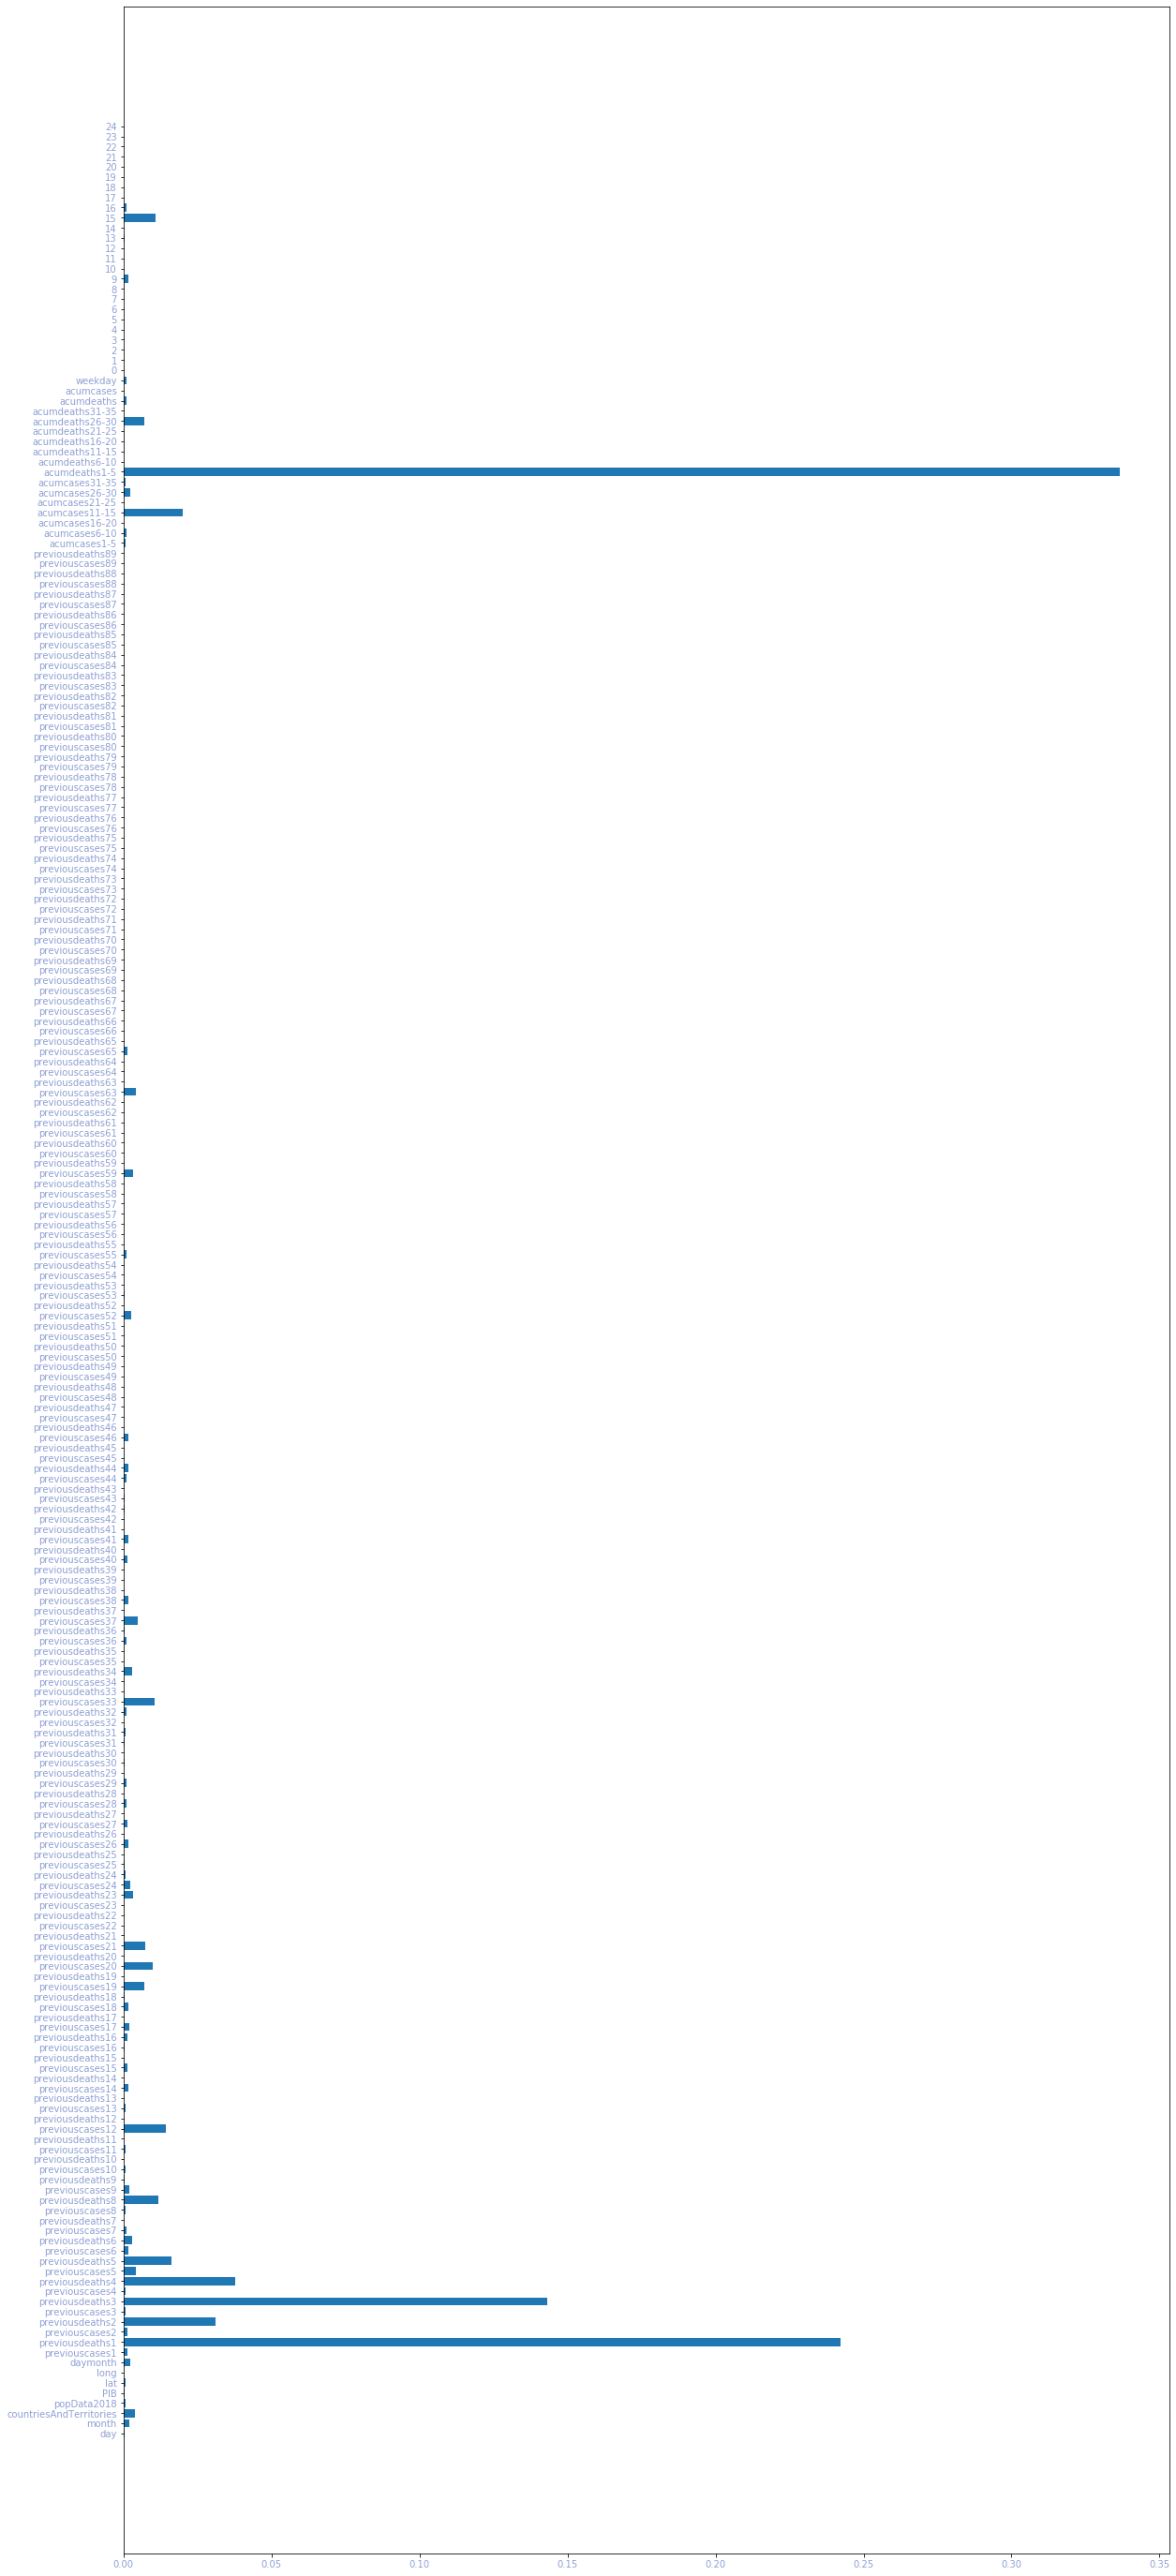

In [143]:
plt.figure(figsize=(20,50))
plt.xticks(fontsize=10,color='#90A0D4')
plt.yticks(fontsize=10,color='#90A0D4')
plt.barh([str(i) for i in train.columns.values],clf.best_estimator_.feature_importances_)

[]

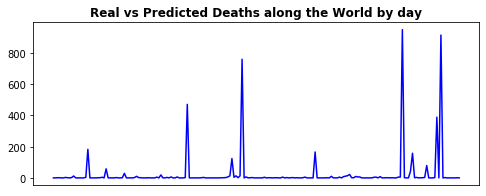

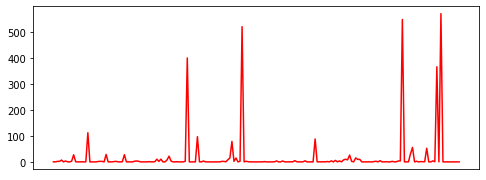

In [144]:
fsize = (8,3)
fig, ax1 = plt.subplots(figsize=fsize)
ax1.plot(testtarget['deaths'].tolist(), color='blue',label = 'reals')
fig, ax2 = plt.subplots(figsize=fsize)
ax2.plot(list(aver), color='red', label = 'predicted')
ax1.set_title('Real vs Predicted Deaths along the World by day',fontweight='bold')
#####################################################################################
ax1.set_xticks([])
ax2.set_xticks([])